In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('C:\\DCHAVAN\\DSTI-Masters\\DilipPersonalStudy\\ClassificationAlgorithms\\ClassifiPython\\classfidata.csv')
train = df[df['flag']=='train']
test = df[df['flag']=='test']

In [3]:
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

y_train = train['y']
x_train = train[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True)

y_test = test['y']
x_test = test[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True)

In [8]:
error_rate = []
for i in range(1,31):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

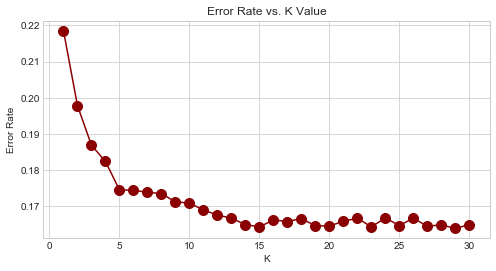

In [9]:
plt.figure(figsize=(8,4))
plt.plot(range(1,31),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [10]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [11]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[11660   775]
 [ 1901  1945]]
accuracy: 0.8356366316565321
precision: 0.7150735294117647
recall: 0.5057202288091524
f1 score:  0.5924459335973195
